<h1><center>Instacart Market Basket Analysis</center></h1>

<img src="instacart1.jpeg" 
     width="600" 
     height="700" />

<h2><center>A case study of RFM model-based customer segmentation using data mining techniques</center></h2>

Instacart is an American company that operates a grocery delivery and pick-up service in the United States and Canada. The company offers its services via a website and mobile app. The service allows customers to order groceries from participating retailers with the shopping being done by a personal shopper.

## Import libraries

In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler

## Read-in dataset

In [139]:
orders = pd.read_csv('orders_data_prep.csv')
orders.head()

,user_id,num_orders,mean_lag,mean_products
0,1,11,19.000000,2.636364
1,2,15,16.285714,2.066667
2,3,13,12.000000,1.384615
3,4,6,17.000000,4.500000
4,5,5,11.500000,1.400000


In [140]:
# Inspect the records of an individual user
user_2 = orders[orders.user_id == 2]
user_2

,user_id,num_orders,mean_lag,mean_products
1,2,15,16.285714,2.066667


## Check descriptibe statistics

In [141]:
orders.describe()

,user_id,num_orders,mean_lag,mean_products
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,16.145000,15.185727,2.747894
std,288.819436,16.370338,6.667097,0.892006
min,1.000000,4.000000,1.000000,0.000000
25%,250.750000,6.000000,9.817647,2.200000
50%,500.500000,10.000000,14.809091,2.750000
75%,750.250000,20.000000,20.186364,3.250000
max,1000.000000,100.000000,30.000000,5.800000


## Plot the correlation of features

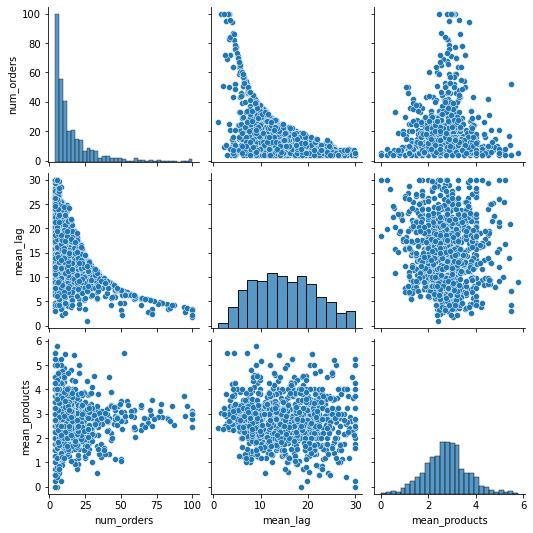

In [142]:
#Plot the correlation between the features num_orders, mean_lag, mean_products
sns.pairplot(orders[['num_orders','mean_lag','mean_products']])

In [143]:
num_orders = orders['num_orders']
mean_lag = orders['mean_lag']
mean_products = orders['mean_products']

In [144]:
# Concatenate new features into one DataFrame
features = pd.concat([num_orders, mean_lag, mean_products], axis=1)
features.columns = ['num_orders', 'mean_lag', 'mean_products']
features.head()

,num_orders,mean_lag,mean_products
0,11,19.000000,2.636364
1,15,16.285714,2.066667
2,13,12.000000,1.384615
3,6,17.000000,4.500000
4,5,11.500000,1.400000


## Plot histogram of features

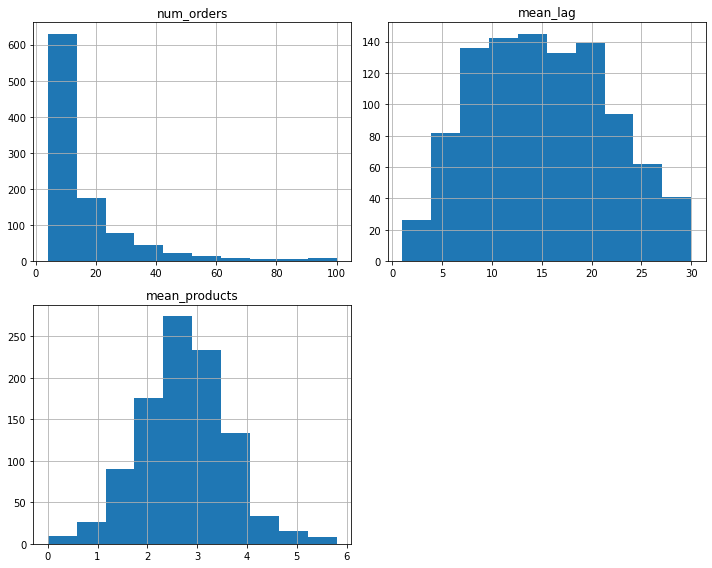

In [145]:
features.hist(figsize=(10,8))
plt.tight_layout();

#### >>> 'num_orders' is skewed positively, so it'll be log-transformed. The other features seem normally distributed.

## Log-transform 'num_orders' and replot

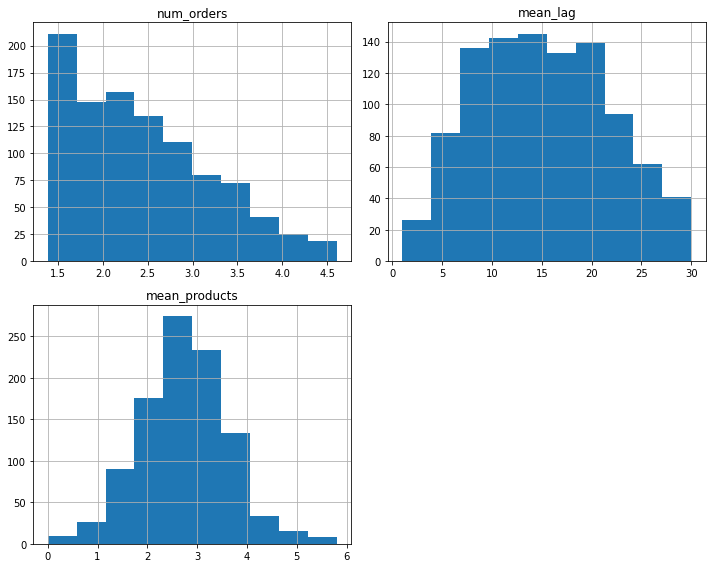

In [146]:
# Log-transform num_orders and replot features
features['num_orders'] = np.log(features['num_orders'])
features.hist(figsize=(10,8))
plt.tight_layout();

#### >>> The distributions of all features now look roughly coherent. The next step is to standardize the features so that the mean = 0 and std = 1. This is for quality purposes since the K-Means algorithm is easily influenced by outliers. 

## Standardize the features 

In [169]:
# Scale the features
scaler = StandardScaler()
feat_scaled = scaler.fit_transform(features)

In [170]:
# Convert to DataFrame and check summary stats
feat_scaled = pd.DataFrame(feat_scaled)
feat_scaled.columns = ['num_orders','mean_lag','mean_products']
feat_scaled.describe()

,num_orders,mean_lag,mean_products
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,9.464651e-17,5.218048e-18,-4.862777e-17
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.329921e+00,-2.128786e+00,-3.082121e+00
25%,-8.151938e-01,-8.055628e-01,-6.145347e-01
50%,-1.667140e-01,-5.651998e-02,2.361743e-03
75%,7.132183e-01,7.504224e-01,5.631767e-01
max,2.756358e+00,2.223109e+00,3.423333e+00


# Plot the elbow method for optimal k

Text(0, 0.5, 'Inertia')

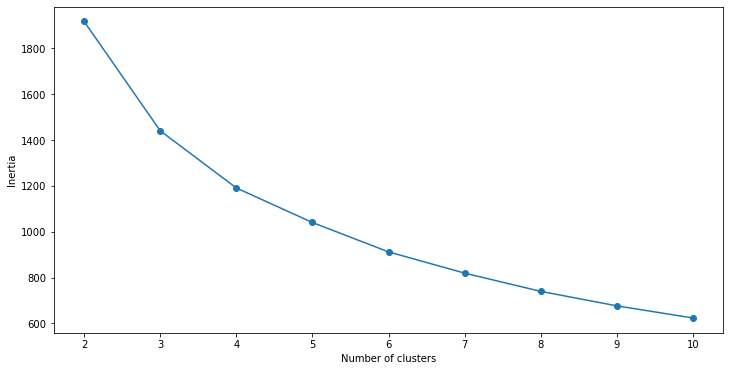

In [171]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
clusters = []
for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(feat_scaled)
    SSE.append(kmeans.inertia_)
    clusters.append(kmeans.labels_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(2,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [172]:
frame

,Cluster,SSE
0,2,1917.494074
1,3,1440.701475
2,4,1191.165874
3,5,1040.442731
4,6,912.208944
5,7,819.563124
6,8,739.989335
7,9,676.711465
8,10,623.838239


In [173]:
clusters_frame = pd.DataFrame(clusters)
clusters_df = pd.DataFrame.transpose(clusters_frame)

# Plot all features with k = 3 clusters as hue

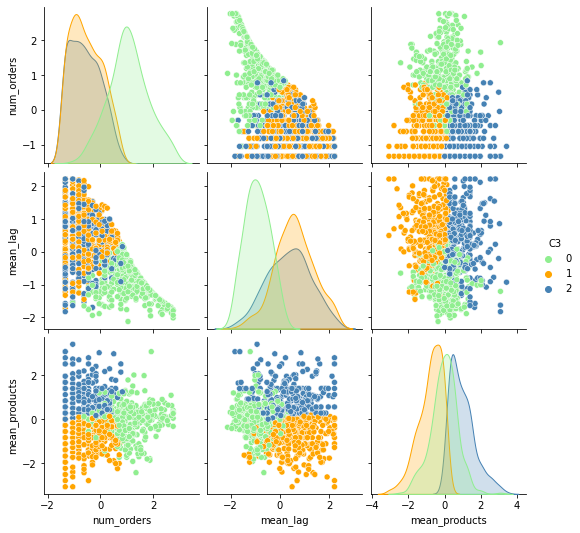

In [181]:
# feat_scaled['C2'] = clusters_df[0]
feat_scaled['C3'] = clusters_df[1]
# feat_scaled['C4'] = clusters_df[2]
palette = ['lightgreen', 'orange', 'steelblue']
sns.pairplot(feat_scaled,hue='C3',palette=palette)

# Create snake plot for optimal k

In [175]:
# Reshape data for snake plot
feat_melt = pd.melt(feat_scaled.reset_index(),
                       id_vars=['C3'],
                       value_vars=['num_orders', 
                                   'mean_lag', 
                                   'mean_products'],
                       var_name='Metric',
                       value_name='Value')

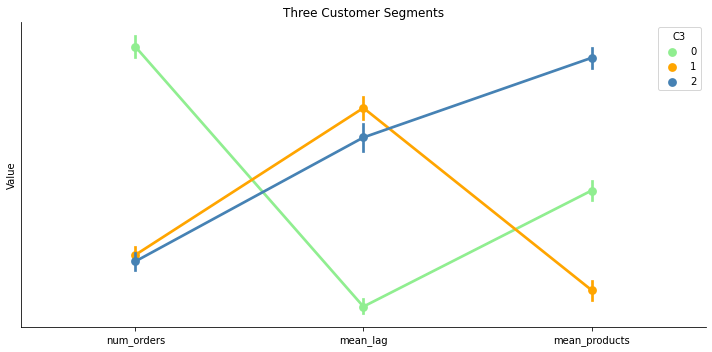

In [180]:
# Create snake plot
palette = ['lightgreen', 'orange', 'steelblue']
plt.figure(figsize=(10,5))
sns.pointplot(x='Metric', y='Value', data=feat_melt, hue='C3', 
              palette=palette)
plt.xlabel('')
plt.ylabel('Value')
plt.yticks([])
plt.title('Three Customer Segments')
sns.despine()
plt.tight_layout()
# plt.savefig('snake_plot.png', dpi=300, pad_inches=2.0)
plt.show();

#### >>> The snake plot above decribes each cluster with respect to 'num_orders', 'mean_lag', and 'mean_products.' Since the values are standardized for quality purposes they are not easy to understand. Therefore, consider the features num_orders, mean_lag, and mean_products as either small, medium, or large.

# Observations

Cluster 0: This customer makes the most orders with the time between the orders being the least of all customer types. It can be said that this customer uses Instacart the most and makes medium sized orders. 
* Marketing Strategy: Maintain this customer's loyalty while increasing revenue.
    1. Increase the frequency of medium-sized orders.
    2. Maintain their order frequency while increasing their order size.

Cluster 1: This customer may use Instacart but not as often and when they do they make small-sized orders.
* Marketing Strategy: The most room for improvement.
    1. Increase their order frequency with small-sized orders.
    2. Maintain their order frequency while increasing their order size.  

Cluster 2: This customer doesn't use Instacart as often, however when they do they make big orders. This customer makes large sized orders.
* Marketing Strategy: Make them more frequent users or maintain customer loyalty.
    1. Increase their order frequency with medium-sized orders.
    2. Maintain order frequency while increasing their order size.

In [183]:
feat_scaled.to_csv('Instacart_Market_Analysis.csv')